In [87]:
!pip3 install ann_visualizer
!pip3 install keras-visualizer

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import tensorflow as tf

from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import accuracy_score

from ann_visualizer.visualize import ann_viz
from keras_visualizer import visualizer 

In [28]:
from google.colab import files
uploaded = files.upload()

Saving DistanceDataset.csv to DistanceDataset (1).csv


In [33]:
datasets = pd.read_csv('DistanceDataset.csv', sep=',')
X = datasets.iloc[:, [0,1]].values
Y = datasets.iloc[:, 2].values
datasets.head()

,R,X,Tnominal
0,-30.0,-1.0,0.0
1,-28.0,-1.0,0.0
2,-26.0,-1.0,0.0
3,-24.0,-1.0,0.0
4,-22.0,-1.0,0.0


In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_Train)

X_train1 = scaler.transform(X_Train)
X_train1 = X_train1.astype(np.float32)

X_test1 = scaler.transform(X_Test)
X_test1 = X_test1.astype(np.float32)

In [43]:
n = 0
for item in Y_Train:
  if item == 1.03:
    Y_Train[n] = 1
  elif item == 0:
    Y_Train[n] = 0
  elif item == 0.23:
    Y_Train[n] = 2
  elif item == 0.43:
    Y_Train[n] = 3
  else:
    Y_Train[n] = 4
  n += 1
Y_Train

array([0., 2., 4., 0., 0., 0., 0., 0., 2., 2., 0., 1., 0., 3., 0., 0., 2.,
       0., 2., 0., 4., 2., 3., 0., 2., 0., 1., 0., 1., 0., 1., 0., 1., 3.,
       0., 0., 0., 0., 0., 0., 0., 2., 3., 3., 0., 0., 1., 0., 0., 0., 0.,
       2., 0., 0., 4., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 2., 0., 0.,
       2., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       3., 1., 0., 1., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 2., 2., 0.,
       2., 0., 0., 0., 3., 0., 0., 2., 3., 2., 0., 1., 0., 0., 1., 0., 0.,
       2., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 4., 2., 4., 0., 0.,
       0., 2., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0.,
       0., 2., 1., 3., 1., 0., 0., 1., 2., 0., 3., 4., 0., 0., 0., 0., 0.,
       0., 1., 0., 4., 0., 0., 2., 0., 4., 0., 0., 0., 0., 2., 0., 3., 0.,
       0., 1., 0., 0., 0.

In [44]:
n = 0
for item in Y_Test:
  if item == 1.03:
    Y_Test[n] = 1
  elif item == 0:
    Y_Test[n] = 0
  elif item == 0.23:
    Y_Test[n] = 2
  elif item == 0.43:
    Y_Test[n] = 3
  else:
    Y_Test[n] = 4
  n += 1
Y_Test

array([0., 0., 1., 0., 0., 0., 2., 0., 4., 3., 0., 0., 0., 0., 0., 3., 3.,
       0., 2., 0., 0., 4., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2., 0.,
       0., 0., 0., 0., 2., 0., 0., 3., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
       0., 1., 2., 0., 2., 0., 0., 4., 0., 0., 1., 3., 0., 3., 2., 2., 0.,
       0., 0., 1., 2., 0., 3., 3., 2., 0., 1., 4., 0., 0., 0., 0., 2., 0.,
       1., 0., 4., 0., 4., 0., 0., 0., 1., 0., 2., 1., 1., 3., 0., 0., 3.,
       0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 3., 0., 0.,
       0., 0., 1., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 2., 2., 4., 2., 2., 1., 0., 1., 0., 0., 0., 2., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 2.])

In [49]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu', kernel_regularizer=l2(0.2)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() 

history = model.fit(X_train1, Y_Train, validation_data = (X_test1, Y_Test), epochs=500, verbose=2)

ann_viz(model, title="Distance_Protection_Curve_DeepNeuralNetwork");
visual = visualizer(model, format='png', view=True)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 10)                30        
                                                                 
 dense_42 (Dense)            (None, 10)                110       
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                                 
 dense_44 (Dense)            (None, 8)                 88        
                                                                 
 dense_45 (Dense)            (None, 5)                 45        
                                                                 
Total params: 383
Trainable params: 383
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
16/16 - 1s - loss: 2.2196 - accuracy: 0.7035

In [65]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

In [72]:
all_predict = model.predict(X_test1)
# print(all_predict)
all_pred_main = []
n = 0
for r in all_predict:
  if find_nearest(all_predict[n], 1)[1] == 0:
    all_pred_main.append(0)
  elif find_nearest(all_predict[n], 1)[1] == 1:
    all_pred_main.append(1)
  elif find_nearest(all_predict[n], 1)[1] == 2:
    all_pred_main.append(2)
  elif find_nearest(all_predict[n], 1)[1] == 3:
    all_pred_main.append(3)
  elif find_nearest(all_predict[n], 1)[1] == 4:
    all_pred_main.append(4)
  n = n+1
print(Y_Test)
print(all_pred_main)
print("accuracy deep neural network: ", accuracy_score(Y_Test, all_pred_main))

[0. 0. 1. 0. 0. 0. 2. 0. 4. 3. 0. 0. 0. 0. 0. 3. 3. 0. 2. 0. 0. 4. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 3. 0. 0. 0. 2. 0. 0.
 0. 0. 0. 0. 1. 2. 0. 2. 0. 0. 4. 0. 0. 1. 3. 0. 3. 2. 2. 0. 0. 0. 1. 2.
 0. 3. 3. 2. 0. 1. 4. 0. 0. 0. 0. 2. 0. 1. 0. 4. 0. 4. 0. 0. 0. 1. 0. 2.
 1. 1. 3. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0.
 0. 1. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 4. 2. 2. 1.
 0. 1. 0. 0. 0. 2. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 2.]
[0, 0, 1, 0, 0, 0, 2, 0, 4, 3, 0, 0, 0, 0, 0, 3, 3, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 4, 0, 0, 1, 3, 0, 3, 2, 2, 0, 0, 0, 1, 2, 0, 3, 3, 2, 0, 0, 4, 0, 0, 0, 0, 2, 0, 1, 0, 4, 0, 4, 0, 0, 0, 1, 0, 2, 1, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 4, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2]
accuracy deep

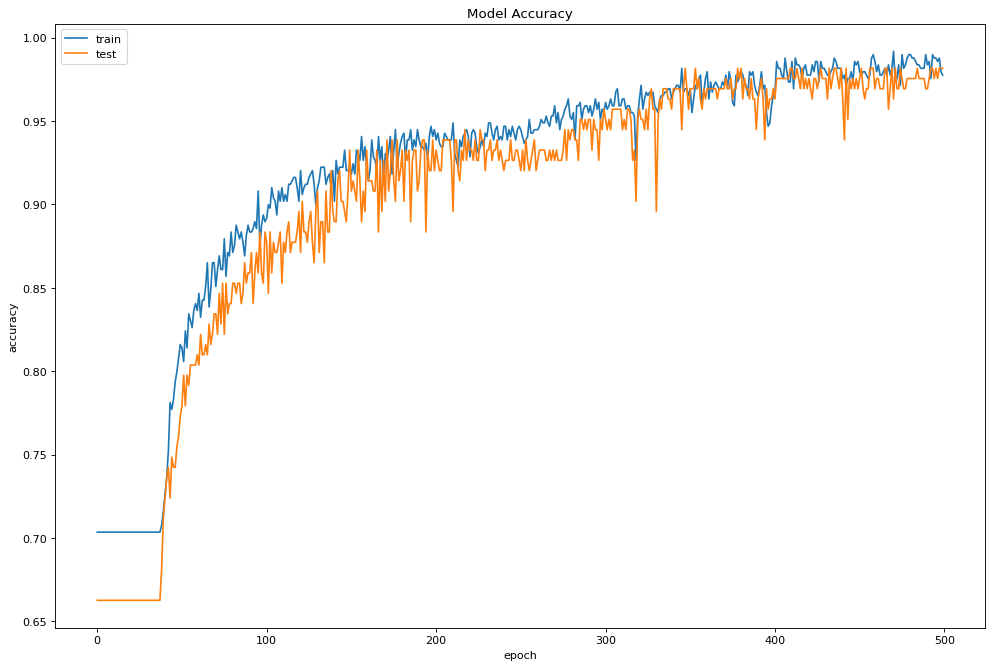

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [91]:
# summarize history for accuracy
figure(figsize=(15, 10), dpi=80)
fig1 = plt.gcf()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

fig1.savefig("model_accuracy.png", dpi=200)
files.download("model_accuracy.png") 

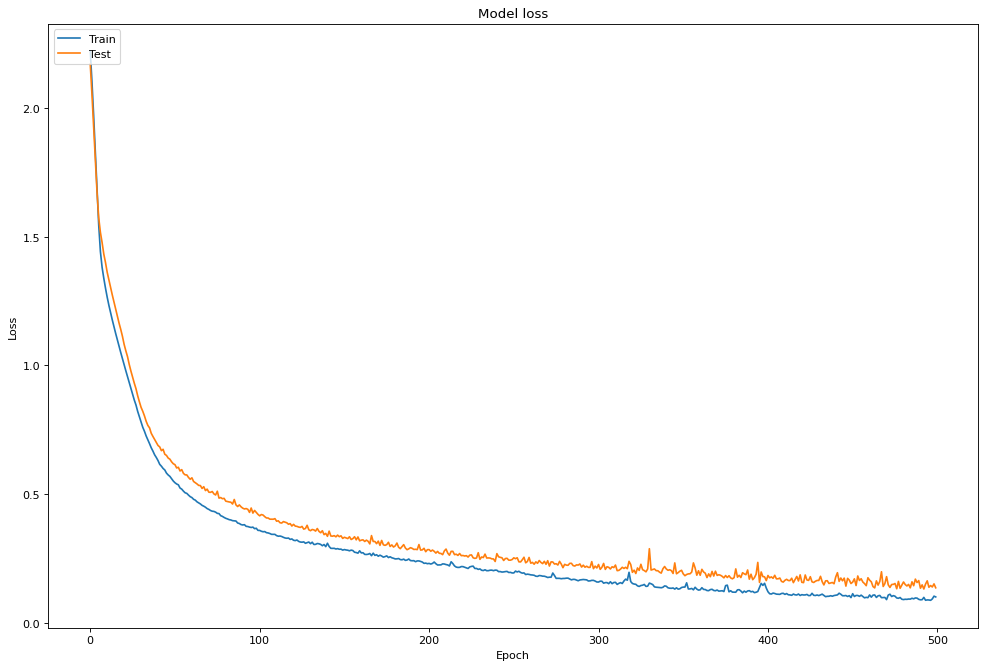

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [90]:
figure(figsize=(15, 10), dpi=80)
fig1 = plt.gcf()

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()
plt.draw()

fig1.savefig("dnn_resolve_overfitting.png", dpi=200)
files.download("dnn_resolve_overfitting.png") 

In [81]:
all_predict = model.predict(X_test1)
print(Y_Test)
all_predict

[0. 0. 1. 0. 0. 0. 2. 0. 4. 3. 0. 0. 0. 0. 0. 3. 3. 0. 2. 0. 0. 4. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 3. 0. 0. 0. 2. 0. 0.
 0. 0. 0. 0. 1. 2. 0. 2. 0. 0. 4. 0. 0. 1. 3. 0. 3. 2. 2. 0. 0. 0. 1. 2.
 0. 3. 3. 2. 0. 1. 4. 0. 0. 0. 0. 2. 0. 1. 0. 4. 0. 4. 0. 0. 0. 1. 0. 2.
 1. 1. 3. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0.
 0. 1. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 4. 2. 2. 1.
 0. 1. 0. 0. 0. 2. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 2.]


array([[1.00000000e+00, 3.28735788e-27, 1.22604565e-27, 1.41835032e-16,
        0.00000000e+00],
       [1.00000000e+00, 3.00086910e-26, 5.12083510e-27, 1.10713559e-15,
        0.00000000e+00],
       [5.04014373e-04, 8.27152133e-01, 1.94334146e-02, 1.71929467e-04,
        1.52738526e-01],
       [9.99853015e-01, 7.51475091e-05, 2.55922146e-07, 7.16109207e-05,
        8.71780454e-18],
       [1.00000000e+00, 3.62522614e-14, 2.89562843e-22, 1.06914133e-16,
        0.00000000e+00],
       [1.00000000e+00, 7.30959856e-24, 5.22651378e-36, 1.46641169e-26,
        0.00000000e+00],
       [4.66592936e-03, 8.51385295e-03, 9.30805683e-01, 3.90607156e-02,
        1.69537608e-02],
       [1.00000000e+00, 6.09694077e-26, 6.63803957e-26, 3.38729513e-15,
        0.00000000e+00],
       [1.46959478e-03, 8.68002921e-02, 1.12352021e-01, 1.68167602e-03,
        7.97696471e-01],
       [1.48692122e-02, 5.41558620e-05, 7.57774115e-02, 9.09299195e-01,
        6.78156808e-10],
       [1.00000000e+00, 7.8617

In [85]:
x_sample = scaler.transform([[-12, -1]])
x_sample = scaler.transform([[14, -1]])
x_sample = scaler.transform([[10, -5]])
x_sample = scaler.transform([[6, -2.5]])

x_sample = x_sample.astype(np.float32)

predict = model.predict(x_sample)
print(predict)
print()
print(find_nearest(predict[0], 1))
print()
if find_nearest(predict[0], 1)[1] == 0:
  print("Result: " + str(0))
elif find_nearest(predict[0], 1)[1] == 1:
  print("Result: " + str(1.03))
elif find_nearest(predict[0], 1)[1] == 2:
  print("Result: " + str(0.23))
elif find_nearest(predict[0], 1)[1] == 3:
  print("Result: " + str(0.43))
elif find_nearest(predict[0], 1)[1] == 4:
  print("Result: " + str(0.03))

[[0.00706716 0.23499775 0.72022516 0.01896897 0.018741  ]]

(0.72022516, 2)

Result: 0.23


In [88]:
model.save( 'models/model.h5' )

tflite_model = tf.keras.models.load_model('models/model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model)
tflite_save = converter.convert()
open("tfliteModel.tflite", "wb").write(tflite_save)

INFO:tensorflow:Assets written to: /tmp/tmp_ypnfq05/assets


4160